In [2]:
#This script aims to compare to plot paired neuron samples (Horizontal vs vertical) of the sample brains

In [1]:
import utils.datautils as datautils
from tqdm import tqdm
import os
from os import path
from os.path import splitext, basename
import re
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.patches as mpatches
import seaborn as sns
%matplotlib inline

In [2]:
data_path = '/home/tli_project/Desktop/Data/T4/neurons/output/New/'
save_path = '/home/tli_project/Desktop/Data/T4/neurons/output/New/fig3_2/'

In [3]:
output_files = datautils.get_file_names(data_path, group_by='_', order=True, nested_files=False, criteria='.csv')

first 5 files
['/home/tli_project/Desktop/Data/T4/neurons/output/New/220209_P36_N2_sA.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/220209_P36_N1_sC.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/220127_P36_N1_sD.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/211121_P36.5_N3_sC.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/211121_P36.5_N2_sA.csv']


In [4]:
test = splitext(basename(output_files[0]))[0]
test.split('_s')[1][0]

'A'

In [5]:
path.splitext(output_files[0])[0]

'/home/tli_project/Desktop/Data/T4/neurons/output/New/220209_P36_N2_sA'

In [6]:
neu_info_df = pd.DataFrame(columns=['neu_name', 'session', 'subtype', 'group'])
for i, n_file in enumerate(output_files):
    neu_name = splitext(basename(n_file))[0]
    session = neu_name.split('_')[0]
    subtype = neu_name.split('_s')[1][0]
    if subtype in ['A','B']:
        group = 'Horizontal'
    elif subtype in ['C', 'D']:
        group = 'Vertical'
    neu_info_df.loc[i] = [neu_name,session,subtype,group]


In [7]:
new_neu_info = pd.DataFrame(columns=neu_info_df.session.unique())
new_neu_info1 = {}
for col in new_neu_info:
    new_neu_info1[col] = neu_info_df[neu_info_df.session==col]
# neu_info_df = new_neu_info1
# del new_neu_info1, 

In [25]:
plot_col = ['timepoint','convex_perimeter','volume']
results_df = pd.read_csv(output_files[0], usecols=['timepoint'])
for n_file in output_files:
    tmp_df = pd.read_csv(n_file, usecols=plot_col)
    tmp_df['result'] = tmp_df.convex_perimeter/tmp_df.volume
    neu_name = splitext(basename(n_file))[0]
    tmp_df = tmp_df.rename(columns={'result':neu_name})
    tmp_df = tmp_df.loc[:,['timepoint',neu_name]]
    results_df = pd.merge(results_df,tmp_df, on='timepoint')
results_df = results_df.set_index('timepoint')

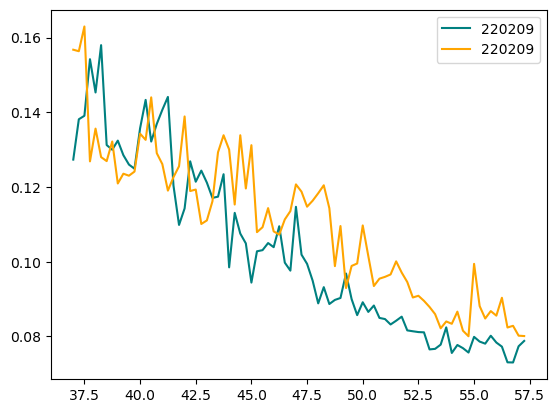

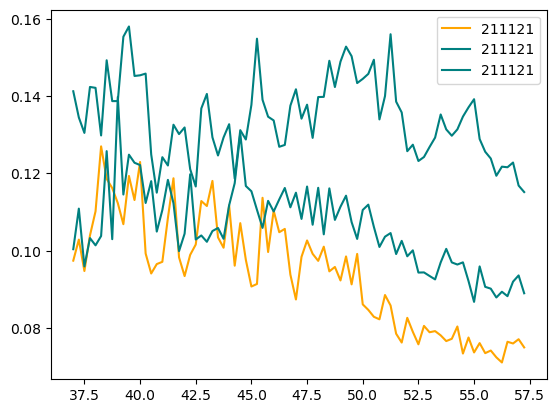

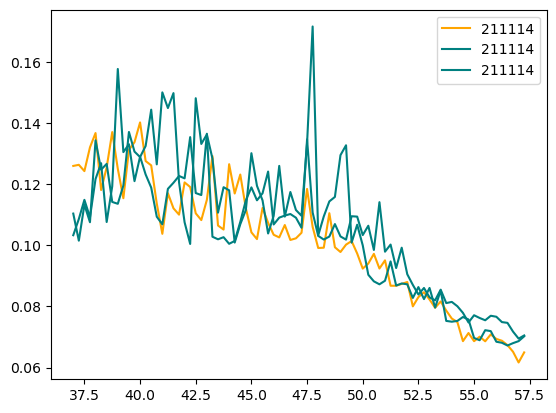

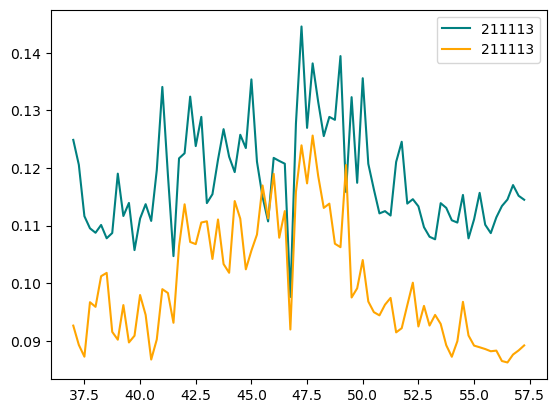

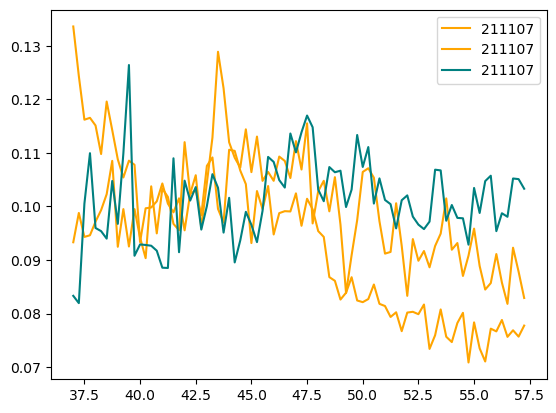

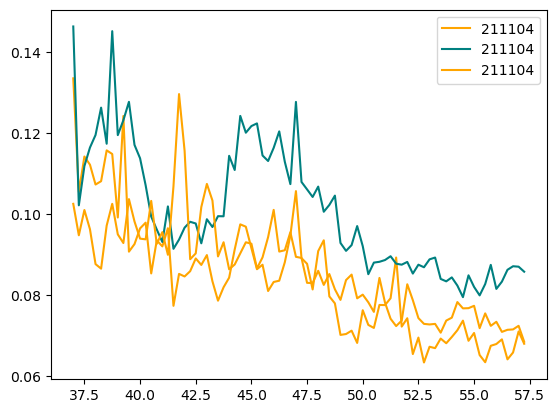

In [26]:
# group_alpha = {'Horizontal':0.9, 'Vertical':0.3}
group_color = {'Horizontal':'teal', 'Vertical':'orange'}
# session_color = {'220209':'r', '220127':'k', '211121':'b', '211114':'violet', '211113':'orange', '211107':'g', '211104':'teal', '211011':'k'}
for key, val in new_neu_info1.items():
    if len(val) > 1:
        fig, ax = plt.subplots(1)
        for i, row in val.iterrows():
            c = group_color[row.group]
            ax.plot(results_df[row.neu_name], c=c, label=row.session)
            plt.legend()

In [132]:
val.shape[0]

1

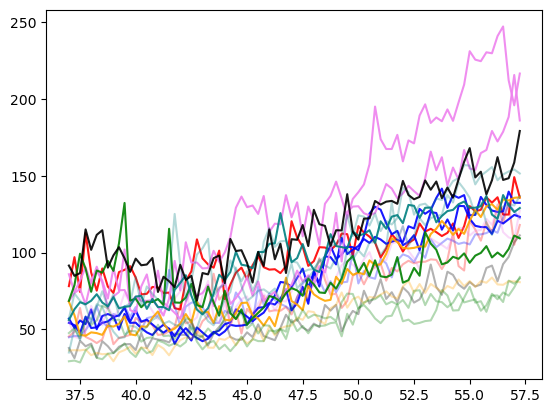

In [83]:
group_alpha = {'Horizontal':0.9, 'Vertical':0.3}
session_color = {'220209':'r', '220127':'k', '211121':'b', '211114':'violet', '211113':'orange', '211107':'g', '211104':'teal', '211011':'k'}
for col in results_df:
    c = session_color[list(neu_info_df[neu_info_df.neu_name==col].session)[0]]
    a = group_alpha[list(neu_info_df[neu_info_df.neu_name==col].group)[0]]
    plt.plot(results_df[col], c=c, alpha=a)

# results_df.groupby()

In [66]:
c = session_color[neu_info_df[neu_info_df.neu_name==col].session[0]]

KeyError: 0

In [79]:
list(neu_info_df[neu_info_df.neu_name==col].session)[0]

'220209'

In [86]:
neu_info_df

,neu_name,session,subtype,group
0,220209_P36_N2_sA,220209,A,Horizontal
1,220209_P36_N1_sC,220209,C,Vertical
2,220127_P36_N1_sD,220127,D,Vertical
3,211121_P36.5_N3_sC,211121,C,Vertical
4,211121_P36.5_N2_sA,211121,A,Horizontal
5,211121_P36.5_N1_sA,211121,A,Horizontal
6,211114_P36_N3_sC,211114,C,Vertical
7,211114_P36_N2_sA,211114,A,Horizontal
8,211114_P36_N1_sA,211114,A,Horizontal
9,211113_P36_N2_sA,211113,A,Horizontal


In [109]:
new_neu_info = pd.DataFrame(columns=neu_info_df.session.unique())
new_neu_info1 = {}
for col in new_neu_info:
    new_neu_info1[col] = neu_info_df[neu_info_df.session==col]

In [111]:
new_neu_info1['220209']

,neu_name,session,subtype,group
0,220209_P36_N2_sA,220209,A,Horizontal
1,220209_P36_N1_sC,220209,C,Vertical


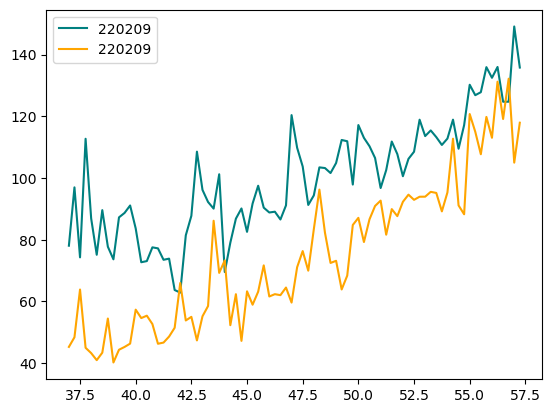

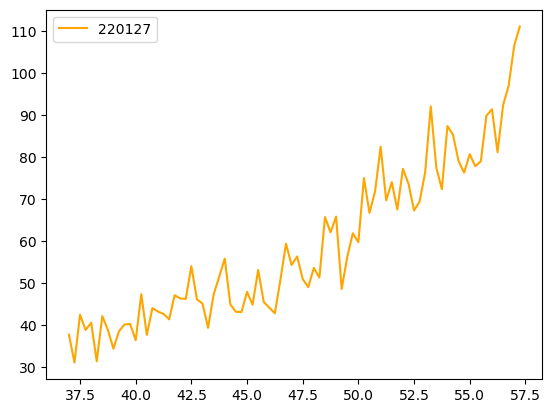

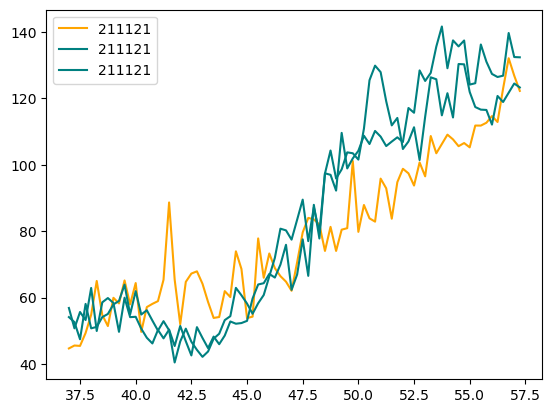

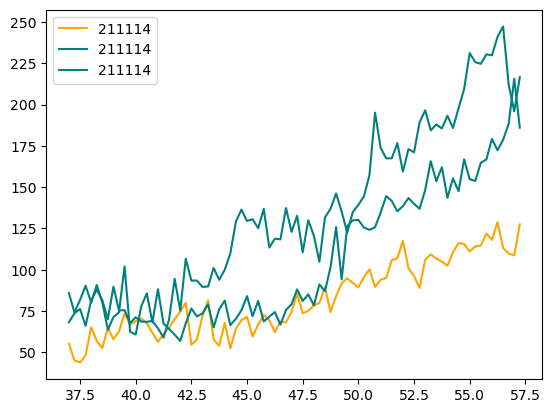

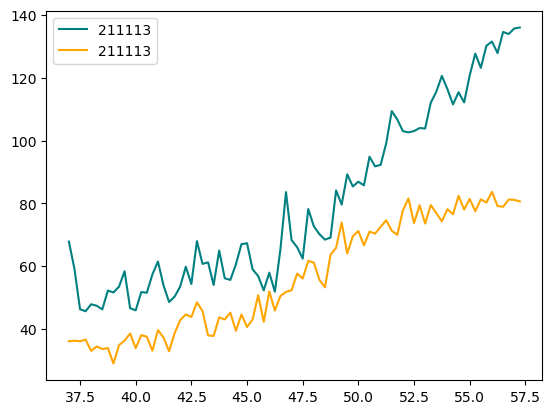

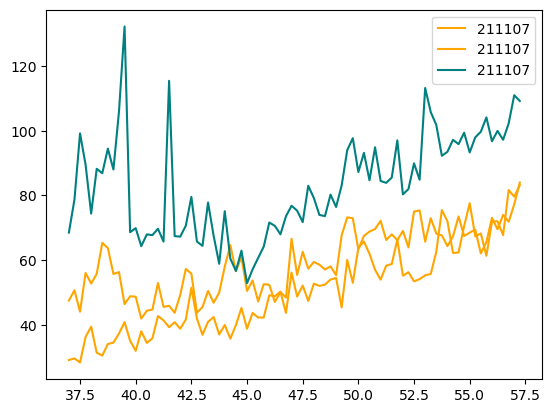

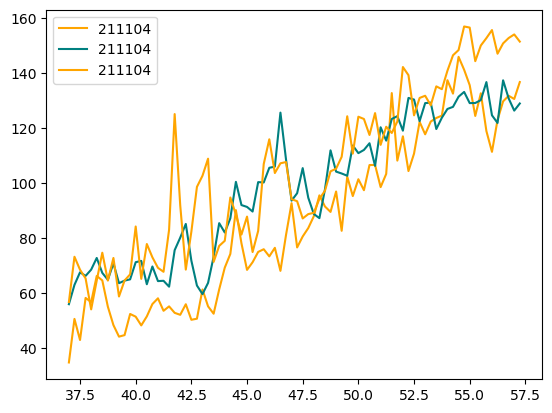

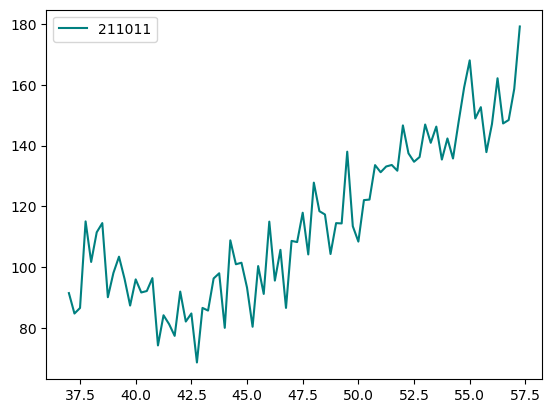

In [118]:
group_alpha = {'Horizontal':0.9, 'Vertical':0.3}
group_color = {'Horizontal':'teal', 'Vertical':'orange'}
session_color = {'220209':'r', '220127':'k', '211121':'b', '211114':'violet', '211113':'orange', '211107':'g', '211104':'teal', '211011':'k'}
for key, val in new_neu_info1.items():
    fig, ax = plt.subplots(1)
    for i, row in val.iterrows():
        c = group_color[row.group]
        ax.plot(results_df[row.neu_name], c=c, label=row.session)
        plt.legend()
        # print(i)
        # print(row)
    # fig, ax = plt.subplots(1)
    # print(type(val))

In [91]:
neu_info_df.groupby(neu_info_df.session)

In [97]:
neu_info_df[neu_info_df.groupby('session').groups]

KeyError: "None of [Index(['211011', '211104', '211107', '211113', '211114', '211121', '220127',\n       '220209'],\n      dtype='object')] are in the [columns]"

In [98]:
neu_info_df2 = neu_info_df.groupby('session')

In [104]:
neu_info_df2.first()

,neu_name,subtype,group
session,,,
211011,211011_P37_N1_sB,B,Horizontal
211104,211104_P36_N3_sC,C,Vertical
211107,211107_P36_N3_sD,D,Vertical
211113,211113_P36_N2_sA,A,Horizontal
211114,211114_P36_N3_sC,C,Vertical
211121,211121_P36.5_N3_sC,C,Vertical
220127,220127_P36_N1_sD,D,Vertical
220209,220209_P36_N2_sA,A,Horizontal


In [49]:
# sns.lineplot(data=results_df, hue=)
# for col in results_df:
#     sns.lineplot(x=results_df.index, y=results_df[col], hue=neu_info_df[neu_info_df.neu_name==col].session)

ValueError: array length 82 does not match index length 83

In [38]:
results_df.iloc[0]

220209_P36_N2_sA      78.068416
220209_P36_N1_sC      45.260736
220127_P36_N1_sD      37.757712
211121_P36.5_N3_sC    44.717792
211121_P36.5_N2_sA    54.155776
211121_P36.5_N1_sA    56.905152
211114_P36_N3_sC      55.241664
211114_P36_N2_sA      68.191456
211114_P36_N1_sA      85.831360
211113_P36_N2_sA      67.868000
211113_P36_N1_sC      36.163536
211107_P36_N3_sD      47.472944
211107_P36_N2_sC      29.076384
211107_P36_N1_sB      68.497584
211104_P36_N3_sC      34.788848
211104_P36_N2_sA      55.986768
211104_P36_N1_sC      56.783856
211011_P37_N1_sB      91.491840
Name: 37.0, dtype: float64

In [45]:
data_path = '/home/tli_project/Desktop/Data/T4/neurons/output/New/'
save_path = '/home/tli_project/Desktop/Data/T4/neurons/output/New/fig3_2/'
viloin_plots_to_do = ['volume','density_3D', 'area', 'convexity_3D',
                        'circularity','AP_spread','DV_spread',
                        'surface_area','asymmetry']
line_plots_to_do = ['PCA_xy','PCA_shift_centroid']
plot_cols = ['volume', 'net_area', 'area', 'convexity_3D',
                'AP_spread', 'DV_spread', '3D_convex_surface', 'PC1_angle',
                'density_2D', 'density_3D', 'object_perimeter', 'convex_perimeter', 
                'circularity', 'compactness', 'surface_area', '3D_convex_volume',
                'eccentricity', 'convexity_2D', 'convexity_3D', 'orientation',
                'feret_diameter_max',
                'DGI', 'cen_EP_dis', 'cen_EP_angle']
time_plots = ['volume', 'net_area', 'area', 'convexity_3D',
                'AP_spread', 'DV_spread', '3D_convex_surface', 'PC1_angle',
                'density_2D', 'density_3D', 'object_perimeter', 'convex_perimeter', 
                'circularity', 'compactness', 'surface_area', '3D_convex_volume',
                'eccentricity', 'convexity_2D', 'convexity_3D', 'orientation',
                'feret_diameter_max',
                'DGI', 'cen_EP_dis', 'cen_EP_angle',
                'asymmetry', 'x_asymmetry', 'y_asymmetry', 'PC1_asymmetry', 'PC2_asymmetry']
norm_T_plots = ['feret_diameter_max', 'DV_spread', 'eccentricity', 'density_3D', 'compactness']
plot_2D_cols = [('cen_EP_X','cen_EP_Y'), ('PC1_x','PC1_y')]
viloin_plots_to_do = ['eccentricity', 'elipse_elongation', 'PCA_elongation']
time_plots = ['eccentricity', 'elipse_elongation', 'PCA_elongation']
plot_cols = ['eccentricity', 'elipse_elongation', 'PCA_elongation']

In [46]:
# plotting settings
Colors = {'A':'b','B':'g','C':'orange','D':'r'}
x_p = {'A':0,'B':1,'C':2,'D':3}

In [47]:
import utils.datautils as datautils
from tqdm import tqdm
import os
from os import path
import re
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.patches as mpatches
import seaborn as sns
%matplotlib inline

In [48]:
output_files = datautils.get_file_names(data_path, group_by='_', order=True, nested_files=False, criteria='.csv')

first 5 files
['/home/tli_project/Desktop/Data/T4/neurons/output/New/220209_P36_N2_sA.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/220209_P36_N1_sC.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/220127_P36_N1_sD.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/211121_P36.5_N3_sC.csv', '/home/tli_project/Desktop/Data/T4/neurons/output/New/211121_P36.5_N2_sA.csv']


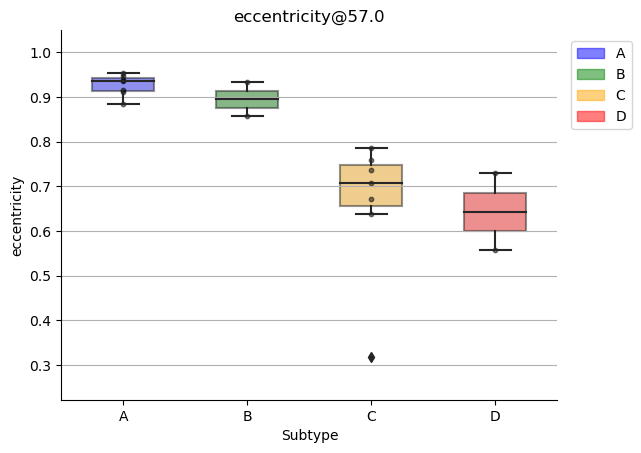

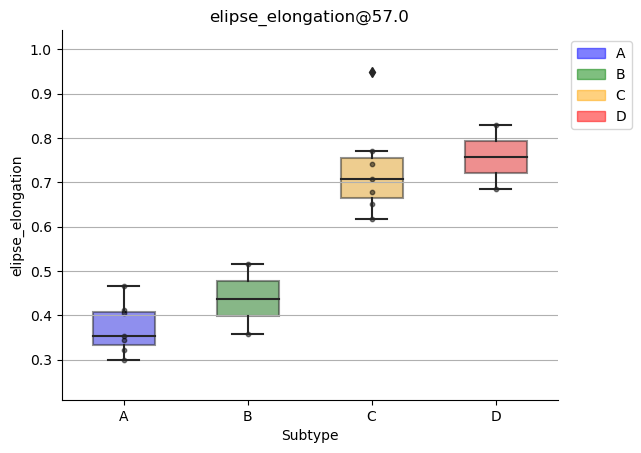

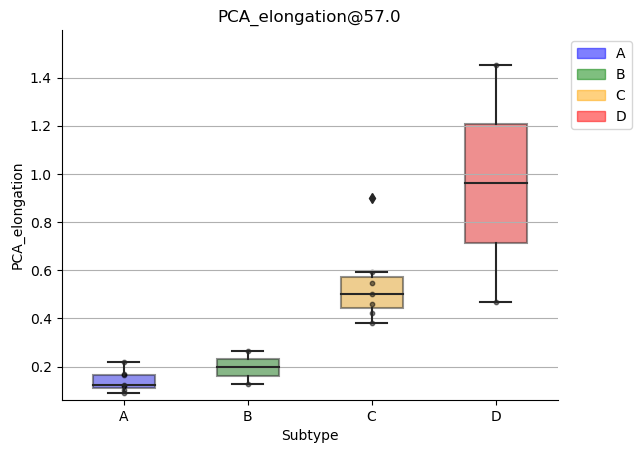

In [49]:
# plotting individual subtypes at specific timepoint
Plot_t = 80
plt_order = ['A', 'B', 'C', 'D']
for plot_col in plot_cols:
    # creating a dataframe with 1 column of timepoints
    timepoints = {'timepoint':np.arange(36,58,0.25)}
    collective_results = pd.DataFrame(timepoints)
    #reading the specified column from each output file, and adding it to collective_results
    for file in output_files:
        neu_name = os.path.basename(file[:file.find('_output.csv')])
        temp_df = pd.read_csv(file, sep=',', usecols = ['timepoint', plot_col])
        temp_df = temp_df.rename(columns={plot_col:neu_name})
        collective_results = pd.merge(collective_results, temp_df, on='timepoint')
    
    y_vals = collective_results.loc[Plot_t]
    del collective_results
    neu_names = list(y_vals.keys()[1:])
    neu_types = [neu.split('_s')[1][0] for neu in neu_names]
    val_col_name = plot_col+'@'+str(y_vals['timepoint'])
    plot_df = {'neu_name':neu_names, 'subtype':neu_types, 
                val_col_name:y_vals[1:]}
    plot_df = pd.DataFrame(plot_df)
    # plot_df.index = range(len(neu_names))
    fig, ax = plt.subplots(1)
    # sns.violinplot(x='subtype', y=plot_col, data=results_df, order=my_order, palette=Colors, hue="subtype")
    
    for i,neu in plot_df.iterrows():
        ax.scatter(x_p[neu.subtype],neu[val_col_name],c='k', marker='o', s=10)
    sns.boxplot(x=plot_df.subtype, y=plot_df[val_col_name], 
                order=plt_order, width=0.5,
                palette=Colors, boxprops=dict(alpha=.5))
    plt.setp(ax.collections, alpha=.5)
    ax.set_title(val_col_name)
    ax.yaxis.grid(True)
    ax.set_xlabel('Subtype')
    ax.set_ylabel(plot_col)
    if plot_df[val_col_name].min() > 0:
        ax.set_ylim(0.7*plot_df[val_col_name].min(),1.1*plot_df[val_col_name].max())
    else:
        ax.set_ylim(2*plot_df[val_col_name].min(),1.2*plot_df[val_col_name].max())
    # x = np.array([0,1,2,3])

    # ax.set_ylim(0.9*plot_df[val_col_name].min(),1.1*plot_df[val_col_name].max())
    sns.despine()
    legend_patches = []
    for subtype,color in Colors.items():
        legend_patches.append(mpatches.Circle((0,0),10,color=color, label=subtype,alpha=0.5))
    plt.legend(handles=legend_patches, bbox_to_anchor=(1.15, 0.97), 
                loc=1, borderaxespad=0., prop={'size': 10})
    plot_name = val_col_name+'hAPF.pdf'
    # plt.savefig(save_path+plot_name, facecolor='white', transparent=False, bbox_inches='tight')


/tmp/ipykernel_834395/274006225.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Hori_subset['mean_'+plot_col] = Hori_subset.mean(axis = 1)
/tmp/ipykernel_834395/274006225.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Hori_subset['std_'+plot_col] = Hori_subset.std(axis = 1)
/tmp/ipykernel_834395/274006225.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

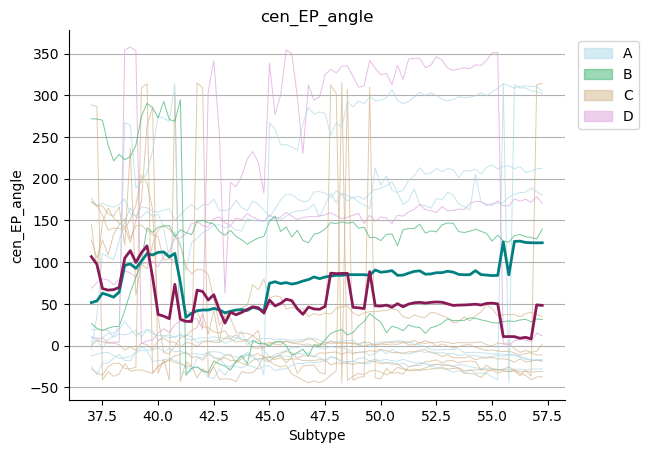

In [144]:
# time plots between horizontal and vertical
# Colors = {'A':'teal','B':'teal','C':'#881a58','D':'#881a58'}
Colors = {'A':'lightblue','B':'mediumseagreen','C':'tan','D':'plum'}
neu_types = {}
for neu in output_files:
    name = path.splitext(path.basename(neu))[0]
    neu_types[name] = name.split('_s')[1]
neu_types = {'neu_type':list(neu_types.values()),'neu_name':list(neu_types.keys())}
neu_types = pd.DataFrame(neu_types)

plt_order = ['A', 'B', 'C', 'D']
for plot_col in time_plots:
    # creating a dataframe with 1 column of timepoints
    timepoints = {'timepoint':np.arange(36,58,0.25)}
    results = pd.DataFrame(timepoints)
    #reading the specified column from each output file, and adding it to collective_results
    for file in output_files:
        neu_name = os.path.basename(file[:file.find('.csv')])
        temp_df = pd.read_csv(file, sep=',', usecols = ['timepoint', plot_col])
        temp_df = temp_df.rename(columns={plot_col:neu_name})
        results = pd.merge(results, temp_df, on='timepoint')
    
    # # # normalize all timepoints based on T0, use the following line 
    # results.loc[:, results.columns != 'timepoint'] = results.loc[:, 
    #                                                 results.columns != 'timepoint'].div(results.loc[0, 
    #                                                                                     results.columns != 'timepoint'])

    # # normalize each neuron to its max 
    # results.loc[:, results.columns != 'timepoint'] = results.loc[:, 
    #                                                 results.columns != 'timepoint'].div(results.loc[:, 
    #                                                                                     results.columns != 'timepoint'].max())

    # dividing the cells into two groups (hori_subset and Vert_subset)
    Hori_subset = neu_types[(neu_types.neu_type == 'A') | (neu_types.neu_type == 'B')]
    Hori_subset = results[Hori_subset.neu_name]
    Hori_subset['mean_'+plot_col] = Hori_subset.mean(axis = 1)
    Hori_subset['std_'+plot_col] = Hori_subset.std(axis = 1)

    Vert_subset = neu_types[(neu_types.neu_type == 'C') | (neu_types.neu_type == 'D')]
    Vert_subset = results[Vert_subset.neu_name]
    Vert_subset['mean_'+plot_col] = Vert_subset.mean(axis = 1)
    Vert_subset['std_'+plot_col] = Vert_subset.std(axis = 1)

    neu_names = list(results.loc[:, results.columns != 'timepoint'].columns)
    fig, ax = plt.subplots(1)
    
    for neu in neu_names:
        # name = path.splitext(path.basename(neu))[0]
        subtype = neu.split('_s')[1]
        plt.plot(results.timepoint,results[neu],c=Colors[subtype], alpha=0.7, linewidth=0.7)
    plt.plot(results.timepoint, Hori_subset['mean_'+plot_col], c='teal', alpha=1, linewidth=2)
    plt.plot(results.timepoint, Vert_subset['mean_'+plot_col], c='#881a58', alpha=1, linewidth=2)
    ax.set_title(plot_col)
    ax.yaxis.grid(True)
    ax.set_xlabel('Subtype')
    ax.set_ylabel(plot_col)
    # ax.set_ylim(0.9*plot_df[val_col_name].min(),1.1*plot_df[val_col_name].max())
    sns.despine()
    legend_patches = []
    for subtype,color in Colors.items():
        legend_patches.append(mpatches.Circle((0,0),10,color=color, label=subtype,alpha=0.5))
    plt.legend(handles=legend_patches, bbox_to_anchor=(1.15, 0.97), 
                loc=1, borderaxespad=0., prop={'size': 10})
    plot_name = plot_col+'_normalized_overtime.pdf'
    plt.savefig(save_path+plot_name, facecolor='white', transparent=False, bbox_inches='tight')

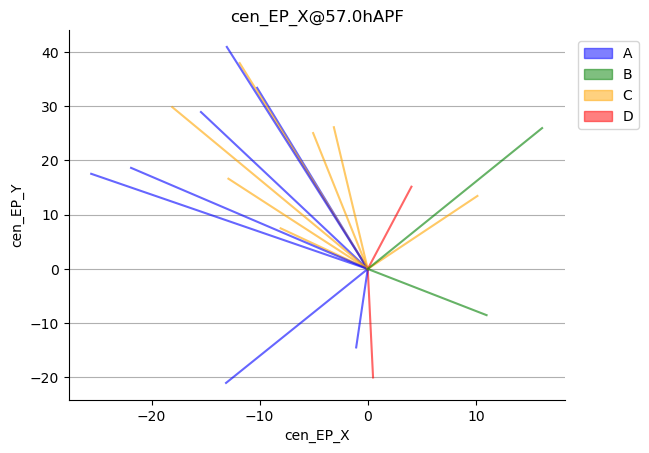

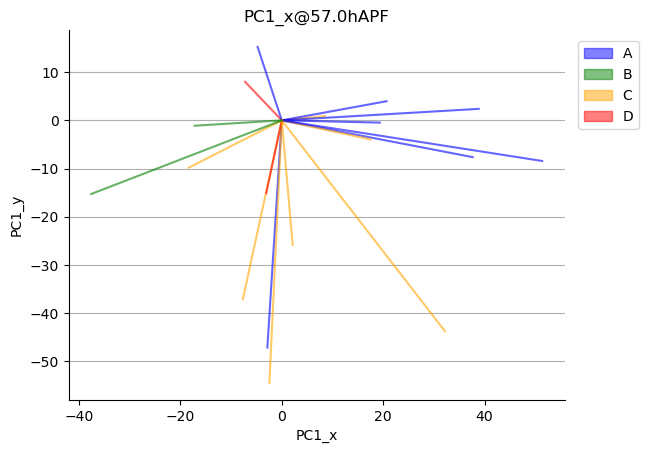

In [106]:
Plot_t = 80
# Colors = {'A':'lightblue','B':'mediumseagreen','C':'tan','D':'plum'}
Colors = {'A':'b','B':'g','C':'orange','D':'r'}
for plot_cols in plot_2D_cols:
    neu_types = {}
    for neu in output_files:
        name = path.splitext(path.basename(neu))[0]
        neu_types[name] = name.split('_s')[1]
    neu_types = {'neu_type':list(neu_types.values()),'neu_name':list(neu_types.keys())}
    neu_types = pd.DataFrame(neu_types)
    results = pd.DataFrame(columns=plot_cols)
    # creating a dataframe with 1 column of timepoints
    # timepoints = {'timepoint':np.arange(36,58,0.25)}
    # results = pd.DataFrame(timepoints)

    #reading the specified column from each output file, and adding it to collective_results
    for i, file in enumerate(output_files):
        neu_name = os.path.basename(file[:file.find('.csv')])
        temp_df = pd.read_csv(file, sep=',', usecols = plot_cols)
        temp_df = {neu_name:temp_df.iloc[Plot_t]}
        temp_df = pd.DataFrame(temp_df).T
        results = pd.concat([results, temp_df]) 
    results['center'] = [0 for i in range(len(results))]

    #ploting
    fig, ax = plt.subplots(1)
    for i, row_val in results.iterrows():
        subtype = i[-1]
        plt.plot((row_val.center,row_val[plot_cols[0]]),
                    (row_val.center,row_val[plot_cols[1]]), 
                    c=Colors[subtype], alpha=0.6)
    ax.set_title(plot_cols[0]+'@'+str(y_vals['timepoint'])+'hAPF')
    ax.yaxis.grid(True)
    ax.set_xlabel(plot_cols[0])
    ax.set_ylabel(plot_cols[1])
    # ax.set_ylim(0.9*plot_df[val_col_name].min(),1.1*plot_df[val_col_name].max())
    sns.despine()
    legend_patches = []
    for subtype,color in Colors.items():
        legend_patches.append(mpatches.Circle((0,0),10,color=color, label=subtype,alpha=0.5))
    plt.legend(handles=legend_patches, bbox_to_anchor=(1.15, 0.97), 
                loc=1, borderaxespad=0., prop={'size': 10})
    plot_name = plot_cols[0]+'@'+str(y_vals['timepoint'])+'hAPF.pdf'
    plt.savefig(save_path+plot_name, facecolor='white', transparent=False, bbox_inches='tight')

/tmp/ipykernel_4124/75293236.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Hori_subset['mean_'] = Hori_subset.mean(axis = 1)
/tmp/ipykernel_4124/75293236.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Hori_subset['std_'] = Hori_subset.std(axis = 1)
/tmp/ipykernel_4124/75293236.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

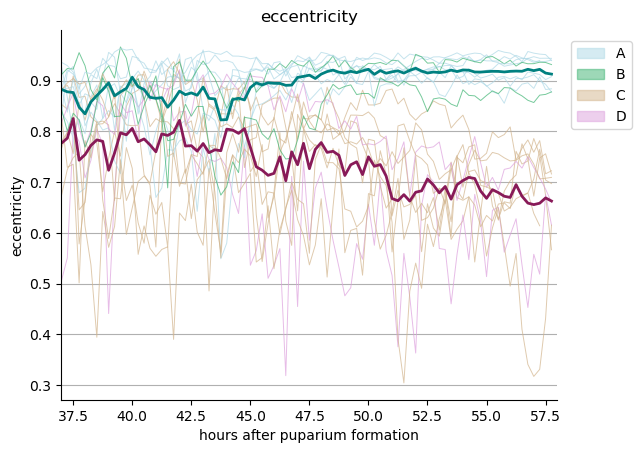

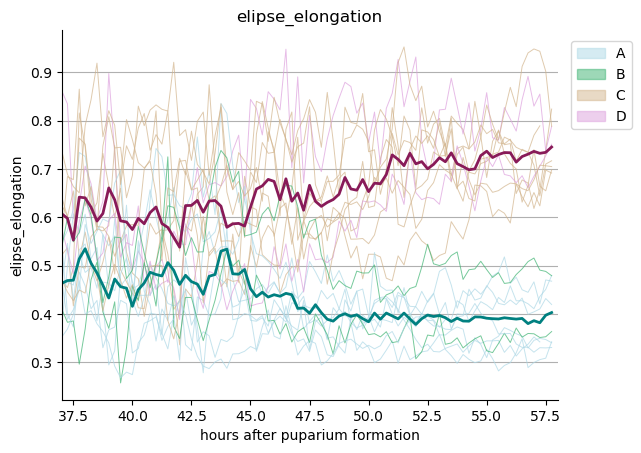

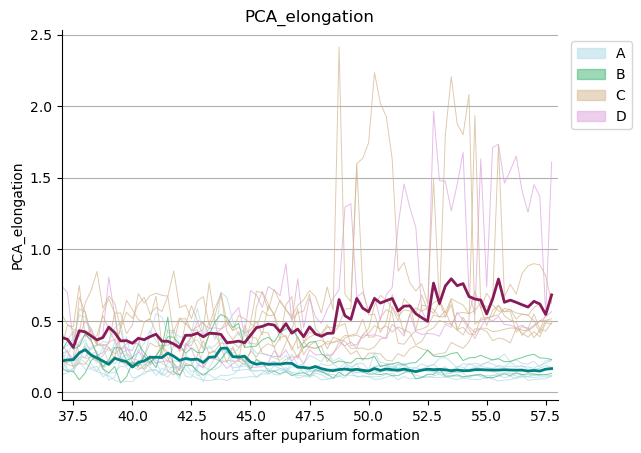

In [50]:
# time plots between horizontal and vertical
# Colors = {'A':'teal','B':'teal','C':'#881a58','D':'#881a58'}
Colors = {'A':'lightblue','B':'mediumseagreen','C':'tan','D':'plum'}
neu_types = {}
for neu in output_files:
    name = path.splitext(path.basename(neu))[0]
    neu_types[name] = name.split('_s')[1]
neu_types = {'neu_type':list(neu_types.values()),'neu_name':list(neu_types.keys())}
neu_types = pd.DataFrame(neu_types)

plt_order = ['A', 'B', 'C', 'D']
norm_T_plots = [('3D_convex_surface', '3D_convex_volume'), ('surface_area','volume')]
for plot_col in time_plots:
    # creating a dataframe with 1 column of timepoints
    timepoints = {'timepoint':np.arange(37,58,0.25)}
    results = pd.DataFrame(timepoints)
    #reading the specified column from each output file, and adding it to collective_results
    for file in output_files:
        neu_name = os.path.basename(file[:file.find('.csv')])
        temp_df = pd.read_csv(file, sep=',', usecols = [plot_col])
        # temp_df = temp_df.rename(columns={plot_col:neu_name})
        results[neu_name] = temp_df
        # results[neu_name] = temp_df[plot_col[0]]/temp_df[plot_col[1]]

    #     # # # normalize all timepoints based on T0, use the following line 
    # results.loc[:, results.columns != 'timepoint'] = results.loc[:, 
    #                                                 results.columns != 'timepoint'].div(results.loc[0, 
    #                                                                                     results.columns != 'timepoint'])

    # # # normalize each neuron to its max 
    # results.loc[:, results.columns != 'timepoint'] = results.loc[:, 
    #                                                 results.columns != 'timepoint'].div(results.loc[:, 
    #                                                                                     results.columns != 'timepoint'].max())

    # dividing the cells into two groups (hori_subset and Vert_subset)
    Hori_subset = neu_types[(neu_types.neu_type == 'A') | (neu_types.neu_type == 'B')]
    Hori_subset = results[Hori_subset.neu_name]
    Hori_subset['mean_'] = Hori_subset.mean(axis = 1)
    Hori_subset['std_'] = Hori_subset.std(axis = 1)

    Vert_subset = neu_types[(neu_types.neu_type == 'C') | (neu_types.neu_type == 'D')]
    Vert_subset = results[Vert_subset.neu_name]
    Vert_subset['mean_'] = Vert_subset.mean(axis = 1)
    Vert_subset['std_'] = Vert_subset.std(axis = 1)

    neu_names = list(results.loc[:, results.columns != 'timepoint'].columns)
    fig, ax = plt.subplots(1)
    
    for neu in neu_names:
        # name = path.splitext(path.basename(neu))[0]
        subtype = neu.split('_s')[1]
        plt.plot(results.timepoint,results[neu],c=Colors[subtype], alpha=0.7, linewidth=0.7)
    plt.plot(results.timepoint, Hori_subset['mean_'], c='teal', alpha=1, linewidth=2)
    plt.plot(results.timepoint, Vert_subset['mean_'], c='#881a58', alpha=1, linewidth=2)
    # ax.set_title('ratio_of_'+plot_col[0]+'_to_'+plot_col[1])
    ax.set_title(plot_col)
    ax.yaxis.grid(True)
    ax.set_xlabel('hours after puparium formation')
    ax.set_xlim(37,58)
    # ax.set_ylabel(plot_col[0]+'/'+plot_col[1])
    ax.set_ylabel(plot_col)
    # ax.set_ylim(0.9*plot_df[val_col_name].min(),1.1*plot_df[val_col_name].max())
    sns.despine()
    legend_patches = []
    for subtype,color in Colors.items():
        legend_patches.append(mpatches.Circle((0,0),10,color=color, label=subtype,alpha=0.5))
    plt.legend(handles=legend_patches, bbox_to_anchor=(1.15, 0.97), 
                loc=1, borderaxespad=0., prop={'size': 10})
    # plot_name = 'ratio_of_'+plot_col[0]+'_to_'+plot_col[1]+'_overtime.pdf'
    # plt.savefig(save_path+plot_name, facecolor='white', transparent=False, bbox_inches='tight')

In [28]:
results

,timepoint
0,36.00
1,36.25
2,36.50
3,36.75
4,37.00
...,...
83,56.75
84,57.00
85,57.25
86,57.50


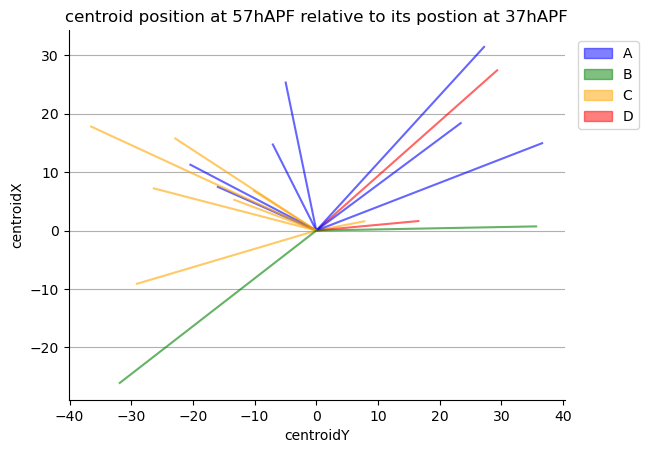

In [152]:
Colors = {'A':'b','B':'g','C':'orange','D':'r'}
plot_cols = ['centroidY', 'centroidX']
neu_types = {}
for neu in output_files:
    name = path.splitext(path.basename(neu))[0]
    neu_types[name] = name.split('_s')[1]
neu_types = {'neu_type':list(neu_types.values()),'neu_name':list(neu_types.keys())}
neu_types = pd.DataFrame(neu_types)

results = pd.DataFrame(columns=plot_cols)
# creating a dataframe with 1 column of timepoints
# timepoints = {'timepoint':np.arange(36,58,0.25)}
# results = pd.DataFrame(timepoints)

#reading the specified column from each output file, and adding it to collective_results
for i, file in enumerate(output_files):
    neu_name = os.path.basename(file[:file.find('.csv')])
    temp_df = pd.read_csv(file, sep=',', usecols = plot_cols)
    temp_df = {neu_name:temp_df.iloc[-1]-temp_df.iloc[0]}
    temp_df = pd.DataFrame(temp_df).T
    results = pd.concat([results, temp_df]) 
results['center'] = [0 for i in range(len(results))]

#ploting
fig, ax = plt.subplots(1)
for i, row_val in results.iterrows():
    subtype = i[-1]
    plt.plot((row_val.center,row_val[plot_cols[0]]),
                (row_val.center,row_val[plot_cols[1]]), 
                c=Colors[subtype], alpha=0.6)
ax.set_title('centroid position at 57hAPF relative to its postion at 37hAPF')
ax.yaxis.grid(True)
ax.set_xlabel(plot_cols[0])
ax.set_ylabel(plot_cols[1])
# ax.set_ylim(0.9*plot_df[val_col_name].min(),1.1*plot_df[val_col_name].max())
sns.despine()
legend_patches = []
for subtype,color in Colors.items():
    legend_patches.append(mpatches.Circle((0,0),10,color=color, label=subtype,alpha=0.5))
plt.legend(handles=legend_patches, bbox_to_anchor=(1.15, 0.97), 
            loc=1, borderaxespad=0., prop={'size': 10})
plot_name = 'centroid_@'+str(y_vals['timepoint'])+'hAPF_relative_to_37hAPF.pdf'
plt.savefig(save_path+plot_name, facecolor='white', transparent=False, bbox_inches='tight')


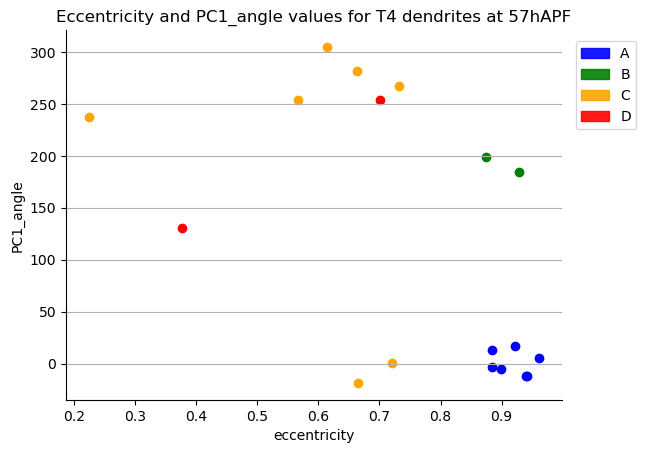

In [191]:
Colors = {'A':'b','B':'g','C':'orange','D':'r'}
plot_cols = ['eccentricity', 'PC1_angle']
neu_types = {}
for neu in output_files:
    name = path.splitext(path.basename(neu))[0]
    neu_types[name] = name.split('_s')[1]
neu_types = {'neu_type':list(neu_types.values()),'neu_name':list(neu_types.keys())}
neu_types = pd.DataFrame(neu_types)

results = pd.DataFrame(columns=plot_cols)

#reading the specified column from each output file, and adding it to collective_results
for i, file in enumerate(output_files):
    neu_name = os.path.basename(file[:file.find('.csv')])
    temp_df = pd.read_csv(file, sep=',', usecols = plot_cols)
    temp_df = temp_df.iloc[-1]
    results.loc[neu_name] = temp_df

    
fig, ax = plt.subplots(1)
for i, neu in neu_types.iterrows():
    neu_name = neu.neu_name
    subtype = neu.neu_type
    c=Colors[subtype]
    data = results.loc[neu_name]
    plt.scatter(data.iloc[0], data.iloc[1], c=c)

ax.set_title('Eccentricity and PC1_angle values for T4 dendrites at 57hAPF')
ax.yaxis.grid(True)
ax.set_xlabel(plot_cols[0])
ax.set_ylabel(plot_cols[1])
# # ax.set_ylim(0.9*plot_df[val_col_name].min(),1.1*plot_df[val_col_name].max())
sns.despine()
legend_patches = []
for subtype,color in Colors.items():
    legend_patches.append(mpatches.Circle((0,0),10,color=color, label=subtype,alpha=0.9))
plt.legend(handles=legend_patches, bbox_to_anchor=(1.15, 0.97), 
            loc=1, borderaxespad=0., prop={'size': 10})
plot_name = 'eccentricity_and_PC1Angle_@_57hAPF.pdf'
plt.savefig(save_path+plot_name, facecolor='white', transparent=False, bbox_inches='tight')

In [160]:
del results['eccentricity']
del results['orientation']

In [176]:
results

,eccentricity,orientation
220209_P36_N2_sA,0.883859,3.173127
220209_P36_N1_sC,0.566718,16.542217
220127_P36_N1_sD,0.377267,49.087458
211121_P36.5_N3_sC,0.720144,-0.296709
211121_P36.5_N2_sA,0.884286,-13.228781
211121_P36.5_N1_sA,0.922429,-16.747940
211114_P36_N3_sC,0.732204,2.587961
211114_P36_N2_sA,0.961908,-5.214066
211114_P36_N1_sA,0.899540,5.299870
211113_P36_N2_sA,0.939659,11.611055


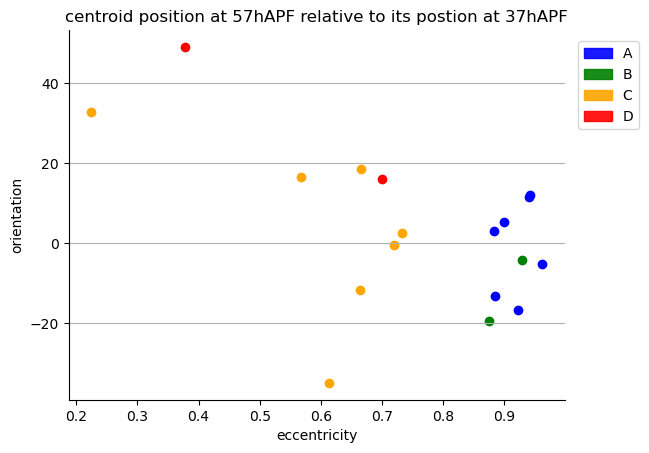

In [177]:
fig, ax = plt.subplots(1)
for i, neu in neu_types.iterrows():
    neu_name = neu.neu_name
    subtype = neu.neu_type
    c=Colors[subtype]
    data = results.loc[neu_name]
    plt.scatter(data.iloc[0], data.iloc[1], c=c)

ax.set_title('centroid position at 57hAPF relative to its postion at 37hAPF')
ax.yaxis.grid(True)
ax.set_xlabel(plot_cols[0])
ax.set_ylabel(plot_cols[1])
# # ax.set_ylim(0.9*plot_df[val_col_name].min(),1.1*plot_df[val_col_name].max())
sns.despine()
legend_patches = []
for subtype,color in Colors.items():
    legend_patches.append(mpatches.Circle((0,0),10,color=color, label=subtype,alpha=0.9))
plt.legend(handles=legend_patches, bbox_to_anchor=(1.15, 0.97), 
            loc=1, borderaxespad=0., prop={'size': 10})
# plot_name = 'centroid_@'+str(y_vals['timepoint'])+'hAPF_relative_to_37hAPF.pdf'
# plt.savefig(save_path+plot_name, facecolor='white', transparent=False, bbox_inches='tight')

In [164]:
neu_types

,neu_type,neu_name
0,A,220209_P36_N2_sA
1,C,220209_P36_N1_sC
2,D,220127_P36_N1_sD
3,C,211121_P36.5_N3_sC
4,A,211121_P36.5_N2_sA
5,A,211121_P36.5_N1_sA
6,C,211114_P36_N3_sC
7,A,211114_P36_N2_sA
8,A,211114_P36_N1_sA
9,A,211113_P36_N2_sA


In [41]:
temp_df.iloc[0]

timepoint     37.000000
centroidY    170.725667
centroidX    206.443814
Name: 0, dtype: float64

In [13]:
for plot_col in plot_2D_cols:
    # creating a dataframe with 1 column of timepoints
    timepoints = {'timepoint':np.arange(36,58,0.25)}
    collective_results_X = pd.DataFrame(timepoints)
    collective_results_Y = pd.DataFrame(timepoints)
    #reading the specified column from each output file, and adding it to collective_results
    for file in output_files:
        neu_name = os.path.basename(file[:file.find('_output.csv')])
        temp_df = pd.read_csv(file, sep=',', usecols = ['timepoint', plot_col[0]])
        temp_df = temp_df.rename(columns={plot_col[0]:neu_name})
        collective_results_X = pd.merge(collective_results_X, temp_df, on='timepoint')
        temp_df = pd.read_csv(file, sep=',', usecols = ['timepoint', plot_col[1]])
        temp_df = temp_df.rename(columns={plot_col[1]:neu_name})
        collective_results_Y = pd.merge(collective_results_Y, temp_df, on='timepoint')
    x_vals = collective_results_X.loc[Plot_t]
    y_vals = collective_results_Y.loc[Plot_t]
    

In [94]:
Plot_t = 80
plt_order = ['A', 'B', 'C', 'D']
for plot_col in plot_2D_cols:
    # creating a dataframe with 1 column of timepoints
    timepoints = {'timepoint':np.arange(36,58,0.25)}
    collective_results = pd.DataFrame(timepoints)
    #reading the specified column from each output file, and adding it to collective_results
    for file in output_files:
        neu_name = os.path.basename(file[:file.find('_output.csv')])
        temp_df = pd.read_csv(file, sep=',', usecols = ['timepoint', plot_col[1]])
        temp_df = temp_df.rename(columns={plot_col[1]:neu_name})
        collective_results = pd.merge(collective_results, temp_df, on='timepoint')
    
    y_vals = collective_results.loc[Plot_t]

In [ ]:
Plot_t = 80
plt_order = ['A', 'B', 'C', 'D']
timepoints = {'timepoint':np.arange(36,58,0.25)}
collective_results = pd.DataFrame(timepoints)
#reading the specified column from each output file, and adding it to collective_results
for file in output_files:
    neu_name = os.path.basename(file[:file.find('_output.csv')])
    temp_df = pd.read_csv(file, sep=',', usecols = ['timepoint', plot_col])
    temp_df = temp_df.rename(columns={plot_col:neu_name})
    collective_results = pd.merge(collective_results, temp_df, on='timepoint')

In [ ]:
# for violin plot of Y_value grouped by subtype on the x_axis
# plot_col = 'convexity_3D'
for plot_col in viloin_plots_to_do:
    fig, ax = plt.subplots(1)
    my_order = ['A', 'B', 'C', 'D']
    # sns.violinplot(x='subtype', y=plot_col, data=results_df, order=my_order, palette=Colors, hue="subtype")
    sns.boxplot(x=results_df.subtype, y=results_df[plot_col], 
                order=my_order, width=0.5,
                palette=Colors, boxprops=dict(alpha=.5))
    plt.setp(ax.collections, alpha=.5)

    ax.set_title(plot_col+' in adult T4 dendrites')
    ax.yaxis.grid(True)
    ax.set_xlabel('Subtype')
    ax.set_ylabel(plot_col)
    ax.set_ylim(0.9*results_df[plot_col].min(),1.1*results_df[plot_col].max())
    x = np.array([0,1,2,3])
    my_xticks = ['A','B','C','D']
    plt.xticks(x, my_xticks)
    sns.despine()
    legend_patches = []
    for subtype,color in Colors.items():
        legend_patches.append(mpatches.Circle((0,0),10,color=color, label=subtype,alpha=0.5))
    plt.legend(handles=legend_patches, bbox_to_anchor=(1.15, 0.97), 
                loc=1, borderaxespad=0., prop={'size': 10})
    plot_name = plot_col+'_in_adult_T4_dendrites.pdf'
    plt.savefig(save_path+plot_name, facecolor='white', transparent=False)

In [5]:
results_df = pd.read_csv(data_path, index_col=0)

In [6]:
results_df.head()

,neuron,subtype,entry_point,volume,net_area,area,AP_spread,DV_spread,density_2D,density_3D,...,yP_scale,yP_angle,yP_xy,yN_weight,yN_scale,yN_angle,yN_xy,PCA_angle,PCA_xy,PCA_shift_centroid
0,T4-02,A,[ 11 347 337],108849,14980,27964,146,267,0.535689,0.363586,...,146.971715,-99.687679,"(-0.0964996688972741, 0.5652782239136788)",0.003842,-112.013844,-279.687679,"(0.07241650660220049, -0.4242032610257114)",-9.687679,"(39.34590188342817, 6.716810136304233)","(4.393954512209415, 21.89753021929927)"
1,T4-03,D,[ 22 651 367],108692,17030,38753,159,336,0.439450,0.219961,...,91.193838,-86.747302,"(0.5951072459657829, 10.471458819771144)",0.526327,-246.534458,-266.747302,"(-7.3624309385526585, -129.54873749074792)",-266.747302,"(-7.3624309385526585, -129.54873749074792)","(-83.91317987304318, -6.3473051991717675)"
2,T4-04,B,[ 18 569 625],186473,21180,43348,167,352,0.488604,0.289973,...,146.007427,-91.955341,"(-0.28542086865273697, 8.360211519175595)",0.074719,-205.685251,-271.955341,"(0.5243854677985635, -15.35968077271772)",-181.955341,"(-104.21433415715065, -3.557917848486889)","(-16.921708624837933, -47.9081530700065)"
3,T4-05,D,[ 10 666 452],170394,22127,51284,207,367,0.431460,0.215020,...,95.363716,-81.309100,"(1.613308582059392, 10.554229281046819)",0.549541,-282.230528,-261.309100,"(-23.435768901607982, -153.31628500324416)",-261.309100,"(-23.435768901607982, -153.31628500324416)","(-97.30143836713606, -15.992372805863232)"
4,T4-06,D,[ 15 441 368],168232,20893,43249,155,367,0.483086,0.240248,...,106.038768,-80.571119,"(2.1034614700853624, 12.66635343034258)",0.467388,-259.251018,-260.571119,"(-19.850616474093734, -119.53388623792972)",-260.571119,"(-19.850616474093734, -119.53388623792972)","(-82.37215767197284, 0.870859272895592)"


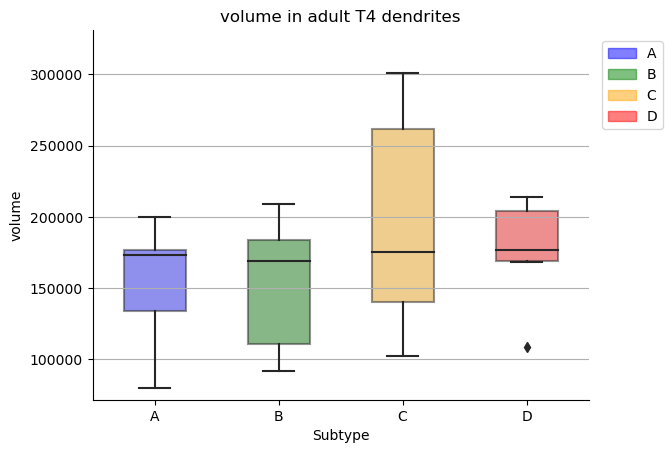

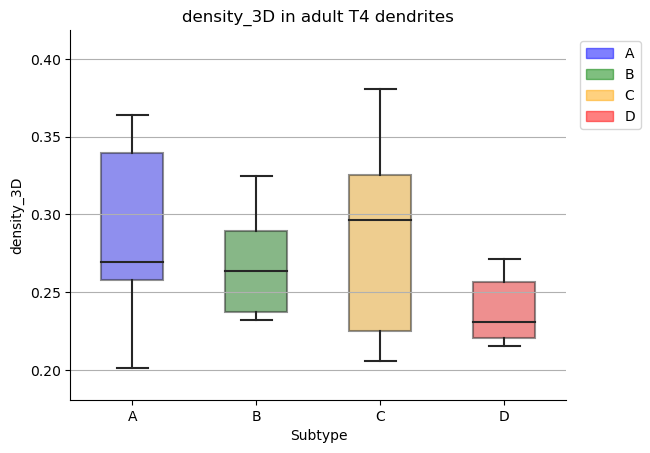

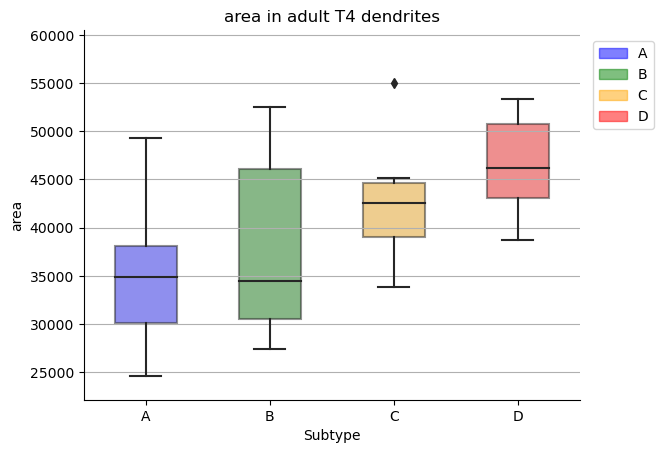

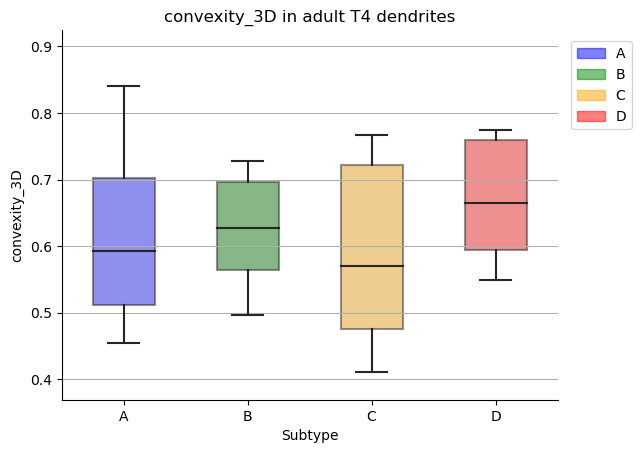

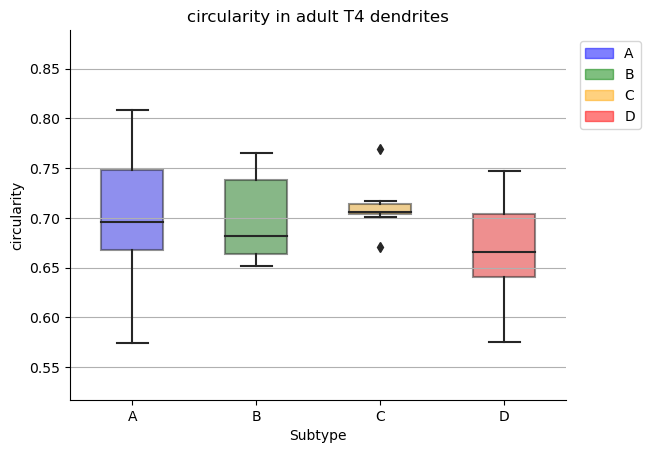

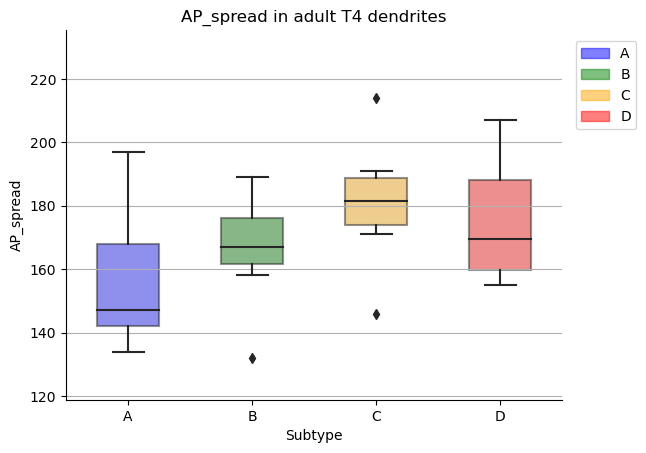

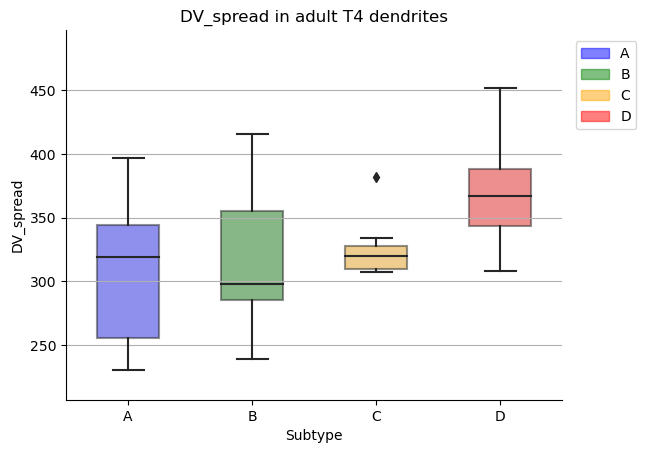

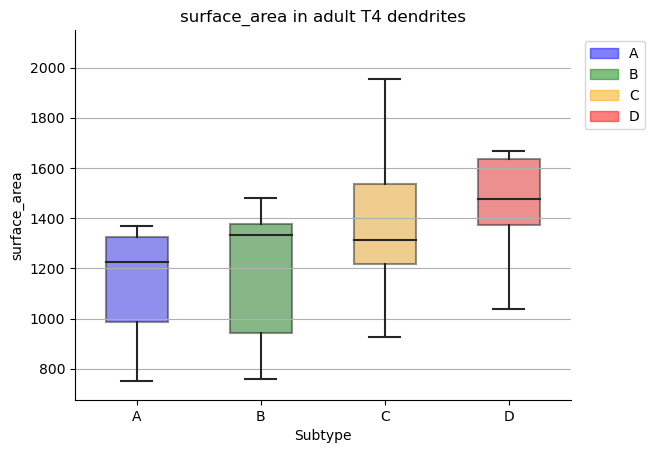

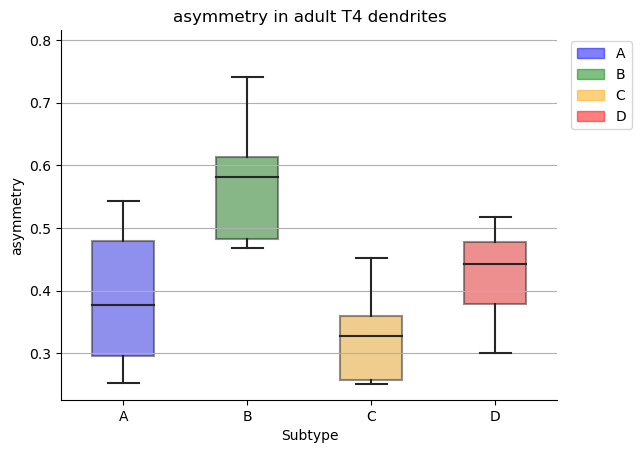

In [7]:
# for violin plot of Y_value grouped by subtype on the x_axis
# plot_col = 'convexity_3D'
for plot_col in viloin_plots_to_do:
    fig, ax = plt.subplots(1)
    my_order = ['A', 'B', 'C', 'D']
    # sns.violinplot(x='subtype', y=plot_col, data=results_df, order=my_order, palette=Colors, hue="subtype")
    sns.boxplot(x=results_df.subtype, y=results_df[plot_col], 
                order=my_order, width=0.5,
                palette=Colors, boxprops=dict(alpha=.5))
    plt.setp(ax.collections, alpha=.5)

    ax.set_title(plot_col+' in adult T4 dendrites')
    ax.yaxis.grid(True)
    ax.set_xlabel('Subtype')
    ax.set_ylabel(plot_col)
    ax.set_ylim(0.9*results_df[plot_col].min(),1.1*results_df[plot_col].max())
    x = np.array([0,1,2,3])
    my_xticks = ['A','B','C','D']
    plt.xticks(x, my_xticks)
    sns.despine()
    legend_patches = []
    for subtype,color in Colors.items():
        legend_patches.append(mpatches.Circle((0,0),10,color=color, label=subtype,alpha=0.5))
    plt.legend(handles=legend_patches, bbox_to_anchor=(1.15, 0.97), 
                loc=1, borderaxespad=0., prop={'size': 10})
    plot_name = plot_col+'_in_adult_T4_dendrites.pdf'
    plt.savefig(save_path+plot_name, facecolor='white', transparent=False)

NameError: name 'x_p' is not defined

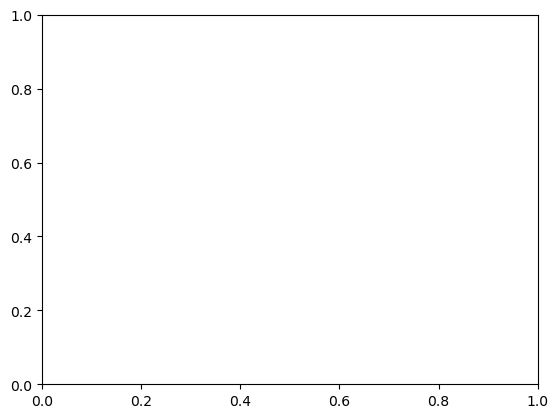

In [8]:
# for violin plot of Y_value grouped by subtype on the x_axis
# plot_col = 'convexity_3D'
for plot_col in viloin_plots_to_do:
    fig, ax = plt.subplots(1)
    # y_vals = results_df.convexity_3D
    for neu,color in Colors.items():
        subset = results_df[plot_col][results_df.subtype==neu]
        violin_parts =  ax.violinplot(subset, positions=[x_p[neu]], vert=True, widths=0.5, 
                                    showmeans=False, showextrema=True, showmedians=False, 
                                    quantiles=[0.5], bw_method=None)
        # for pc in violin_parts['bodies']:
        #     pc.set_facecolor(color)
        #     pc.set_edgecolor(color)

    ax.set_ylim(0.9*results_df[plot_col].min(),1.1*results_df[plot_col].max())

    ax.set_title(plot_col+' in adult T4 dendrites')
    ax.yaxis.grid(True)
    ax.set_xlabel('Subtype')
    ax.set_ylabel(plot_col)
    x = np.array([0,1,2,3])
    my_xticks = ['A','B','C','D']
    plt.xticks(x, my_xticks)
    sns.despine()

    legend_patches = []
    for subtype,color in Colors.items():
        legend_patches.append(mpatches.Circle((0,0),10,color=color, label=subtype,alpha=0.5))
    plt.legend(handles=legend_patches, bbox_to_anchor=(1.15, 0.97), 
                loc=1, borderaxespad=0., prop={'size': 10})
    plot_name = plot_col+'_in_adult_T4_dendrites.pdf'
    # plt.savefig(save_path+plot_name, facecolor='white', transparent=False)

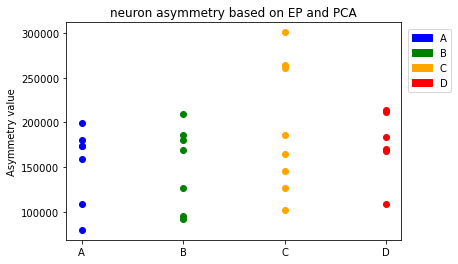

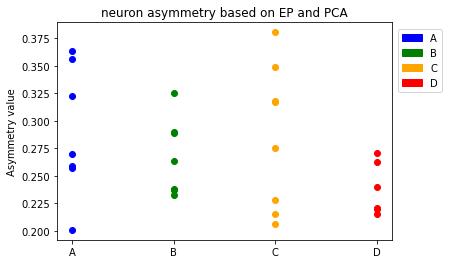

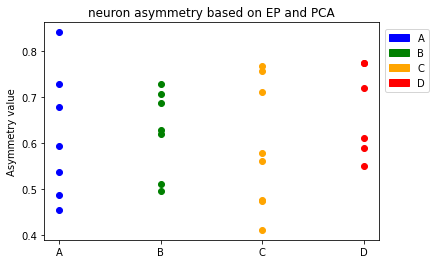

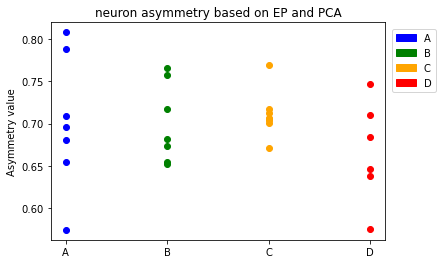

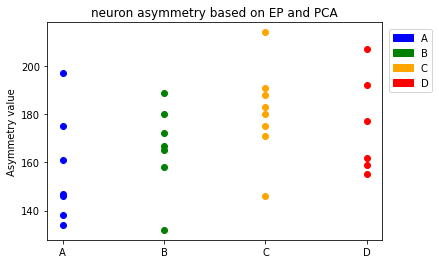

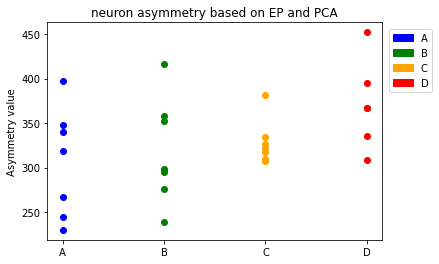

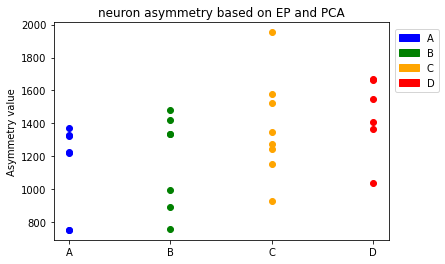

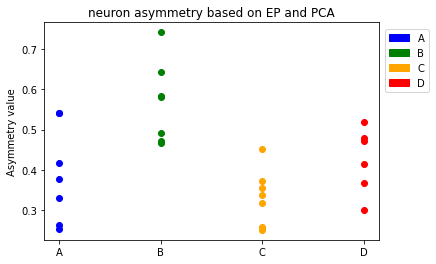

In [ ]:
# for violin plot of Y_value grouped by subtype on the x_axis
for plot_col in viloin_plots_to_do:
    fig, ax = plt.subplots(1)
    colors = {'A':'b','B':'g','C':'orange','D':'r'}
    x_p = {'A':1,'B':2,'C':3,'D':4}
    y_vals = results_df[plot_col]
    for i,neu in enumerate(y_vals):
        ax.scatter(x_p[results_df.subtype[i]],neu,c=colors[results_df.subtype[i]])
    
    ax.set_ylim(0.9*results_df[plot_col].min(),1.1*results_df[plot_col].max())

    ax.set_title(plot_col+' in adult T4 dendrites')
    ax.yaxis.grid(True)
    ax.set_xlabel('Subtype')
    ax.set_ylabel(plot_col)
    x = np.array([0,1,2,3])
    my_xticks = ['A','B','C','D']
    plt.xticks(x, my_xticks)
    sns.despine()

    legend_patches = []
    for subtype,color in colors.items():
        legend_patches.append(mpatches.Circle((0,0),10,color=color, label=subtype))
    plt.legend(handles=legend_patches, bbox_to_anchor=(1.15, 0.97), 
                loc=1, borderaxespad=0., prop={'size': 10})
    # plt.savefig(save_path+'adult_T4_Asymmetry.png', facecolor='white', transparent=False)

/tmp/ipykernel_759423/2965648711.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  col_vals = col_vals.str.replace(i,'')
/tmp/ipykernel_759423/2965648711.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  col_vals = col_vals.str.replace(i,'')


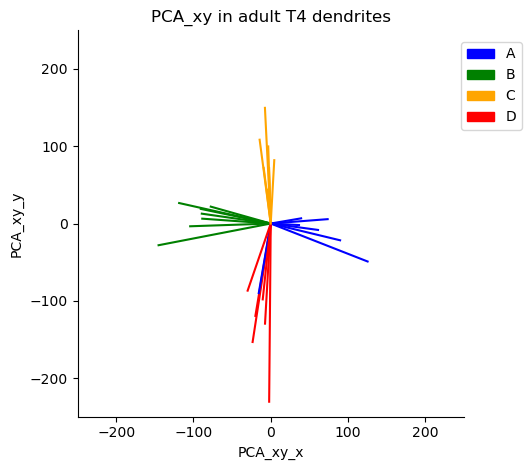

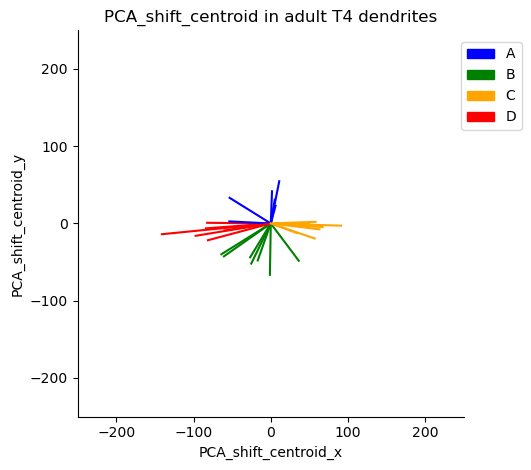

In [9]:
# To plot x,y value of one metric for individual neurons, colored by subtype
for plot_col in line_plots_to_do:
    fig, ax = plt.subplots(1)
    col_vals = results_df[plot_col]
    for i in ['(',')','[',']']:
        col_vals = col_vals.str.replace(i,'')
    col_vals = col_vals.str.split(',')
    for i, val in col_vals.items():
        col_vals[i] = [float(n) for n in val]
    for i,neu in enumerate(col_vals):
        ax.plot((0,neu[0]),(0,neu[1]),c=Colors[results_df.subtype[i]])
    
    # ax.set_ylim(1.2*y_vals.str[1].min(),1.2*y_vals.str[1].max())
    # ax.set_xlim(1.2*y_vals.str[0].min(),1.2*y_vals.str[0].max())

    ax.set_ylim(-250,250)
    ax.set_xlim(-250,250)

    ax.set_title(plot_col+' in adult T4 dendrites')
    ax.set_xlabel(plot_col+'_x')
    ax.set_ylabel(plot_col+'_y')
    sns.despine()

    legend_patches = []
    for subtype,color in Colors.items():
        legend_patches.append(mpatches.Circle((0,0),10,color=color, label=subtype))
    plt.legend(handles=legend_patches, bbox_to_anchor=(1.15, 0.97), 
                loc=1, borderaxespad=0., prop={'size': 10})

    ax.set_aspect('equal', 'box')
    fig.tight_layout()
    plot_name = plot_col+'_in_adult_T4_dendrites.pdf'
    plt.savefig(save_path+plot_name, facecolor='white', transparent=False)